In [3]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns
import os

**Components of Time Series Data**
There are four important
components of a time series. These components are called the trend component, the seasonal
component, the cyclic component, and the random (or noise) component.

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/number_of_heavily_wounded_car_accidents_VL.txt',delimiter = "\t", parse_dates=['date']).set_index(['date'])
data.head()

,number_of_heavily_wounded
date,
2013-01-01,285
2013-02-01,276
2013-03-01,332
2013-04-01,381
2013-05-01,393


<AxesSubplot:xlabel='date'>

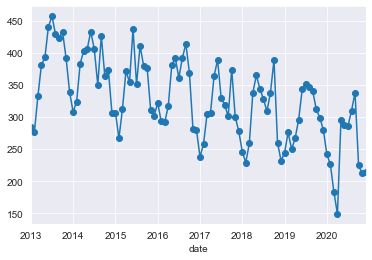

In [7]:
transactions_ts = pd.Series(
    data=np.array(data['number_of_heavily_wounded']),
    index=data.index
)
transactions_ts.plot(marker='o')

<AxesSubplot:>

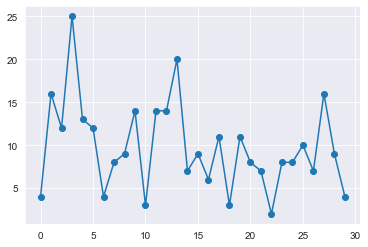

In [8]:
#another example of pandas series
demand_ts = pd.Series(
    data=[4, 16, 12, 25, 13, 12, 4,  8, 9, 14,
          3, 14, 14, 20,  7,  9, 6, 11, 3, 11,
          8,  7,  2,  8,  8, 10, 7, 16, 9,  4]
)
demand_ts.plot(marker='o')

## Time series models
constant function

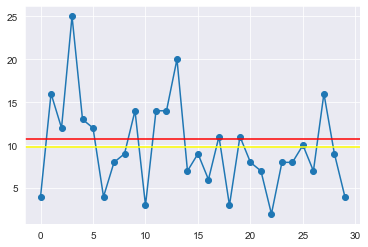

In [9]:
b_est_20 = demand_ts[0:20].mean()
b_est_30 = demand_ts[0:30].mean()

demand_ts.plot(marker='o')             # Plot the time series
plt.axhline(y=b_est_20, color='red')   # Mean of first 20 observations
plt.axhline(y=b_est_30, color='yellow')  # Mean of first 30 observations

linear regression

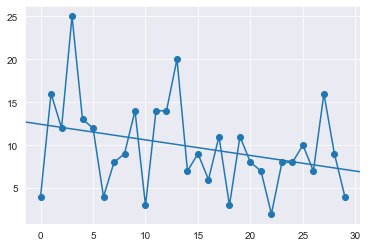

In [10]:
# Build a linear regression model
demand_lm = LinearRegression().fit(
    demand_ts.index.values.reshape((-1,1)),
    demand_ts.values
)
# plot the time series and the regression line
demand_ts.plot(marker='o')
plt.axline((0, demand_lm.intercept_), slope=demand_lm.coef_)

<AxesSubplot:>

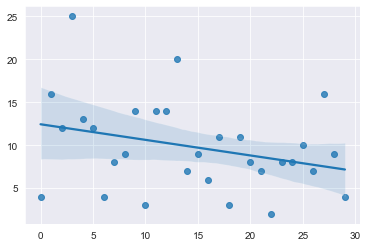

In [11]:
sns.regplot(x=demand_ts.index, y=demand_ts.values)

## Moving average
### Simple Moving Average

In [12]:
dates = pd.date_range("2021-01-01", periods=30, freq='W')

demand_df = pd.DataFrame(data=demand_ts.values, columns=['demand'], index=dates)
demand_df['SMA3'] = demand_df.demand.rolling(3).mean()
demand_df['SMA5'] = demand_df.demand.rolling(5).mean()
demand_df['SMA10'] = demand_df.demand.rolling(10).mean()
demand_df

,demand,SMA3,SMA5,SMA10
2021-01-03,4,NaN,NaN,NaN
2021-01-10,16,NaN,NaN,NaN
2021-01-17,12,10.666667,NaN,NaN
2021-01-24,25,17.666667,NaN,NaN
2021-01-31,13,16.666667,14.0,NaN
2021-02-07,12,16.666667,15.6,NaN
2021-02-14,4,9.666667,13.2,NaN
2021-02-21,8,8.000000,12.4,NaN
2021-02-28,9,7.000000,9.2,NaN
2021-03-07,14,10.333333,9.4,11.7


<AxesSubplot:>

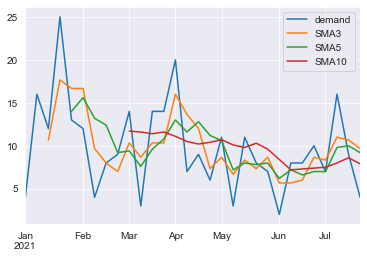

In [13]:
demand_df.plot()

### Exponential Moving Average (EMA)

<AxesSubplot:>

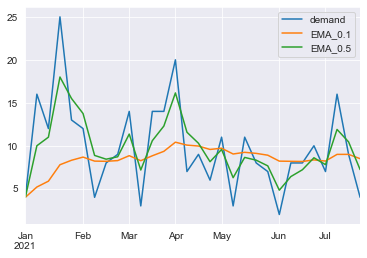

In [14]:
demand_df['EMA_0.1'] = demand_df.demand.ewm(alpha=.1, adjust=False).mean()
demand_df['EMA_0.5'] = demand_df.demand.ewm(alpha=.5, adjust=False).mean()
demand_df[['demand', 'EMA_0.1', 'EMA_0.5']].plot()

<AxesSubplot:>

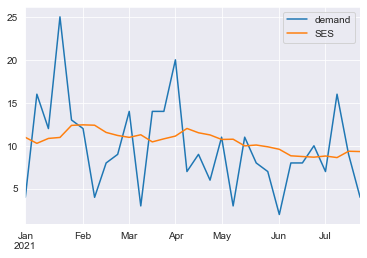

In [15]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
demand_ses = SimpleExpSmoothing(demand_df.demand).fit(smoothing_level=0.1)

demand_df['SES'] = demand_ses.fittedvalues

demand_df.demand.plot(legend=True)
demand_df.SES.plot(legend=True)

These statsmodels classes allow us to do a prediction based on the model:

<AxesSubplot:>

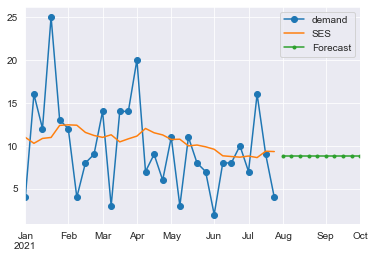

In [16]:
demand_ses_fcast = demand_ses.forecast(10)

demand_df.demand.plot(marker='o', legend=True) # Observations
demand_df.SES.plot(legend=True)                # SES fitted valuis
demand_ses_fcast.plot(marker='.', legend=True, label='Forecast')

When we use Single Exponential Smoothing, we assume that the underlying time series fluctutates around some constant value. This is reflected by the forecasted values (in green), which are always the same:

In [17]:
demand_ses_fcast.values

array([8.79377951, 8.79377951, 8.79377951, 8.79377951, 8.79377951,
       8.79377951, 8.79377951, 8.79377951, 8.79377951, 8.79377951])

### Double exponential smoothing
If we suspect that there is a long-term (increasing or decreasing) trend in the time series, we can use Double Exponential Smoothing (DES), also called Holt's Method.

<AxesSubplot:>

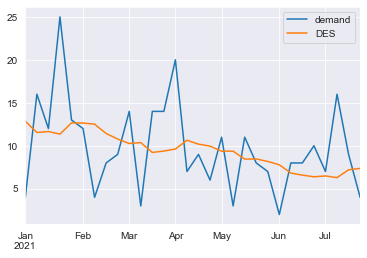

In [18]:
from statsmodels.tsa.api import Holt

demand_des = Holt(demand_df.demand).fit(smoothing_level=.1, smoothing_trend=.2)

demand_df['DES'] = demand_des.fittedvalues

demand_df.demand.plot(legend=True)
demand_df.DES.plot(legend=True)

In [19]:
demand_des.params_formatted

,name,param,optimized
smoothing_level,alpha,0.100000,False
smoothing_trend,beta,0.200000,False
initial_level,l.0,13.110484,True
initial_trend,b.0,-0.250692,True


To use this model for forecasting

<AxesSubplot:>

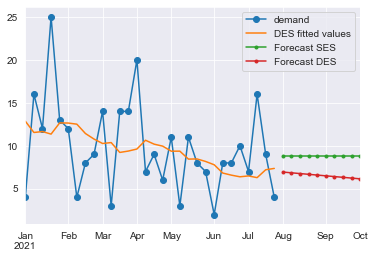

In [20]:
demand_des_fcast = demand_des.forecast(10)

demand_df.demand.plot(marker='o', legend=True) # Observations
demand_df.DES.plot(legend=True, label='DES fitted values')
demand_ses_fcast.plot(marker='.', legend=True, label='Forecast SES')
demand_des_fcast.plot(marker='.', legend=True, label='Forecast DES')

In [21]:
demand_des_fcast

2021-08-01    6.940416
2021-08-08    6.852768
2021-08-15    6.765120
2021-08-22    6.677472
2021-08-29    6.589824
2021-09-05    6.502177
2021-09-12    6.414529
2021-09-19    6.326881
2021-09-26    6.239233
2021-10-03    6.151585
Freq: W-SUN, dtype: float64

### Triple Exponential Smoothing

Triple Exponential Smoothing (TES), also called *Holt-Winter's Method*, can in addition also model seasonally recurring trends.

In [22]:
# Load the dataset
flights = sns.load_dataset('flights')
# Add a column for the date (last day of each month)
flights['date'] = pd.date_range(start="1949-01-01", freq='MS',
    periods=len(flights))

# Only keep the useful columns and set the index
flights = flights[['date', 'passengers']].set_index(['date'])
flights.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='date'>

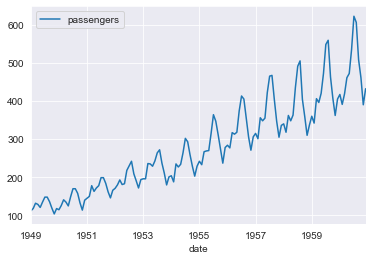

In [23]:
flights.plot()

<AxesSubplot:xlabel='date'>

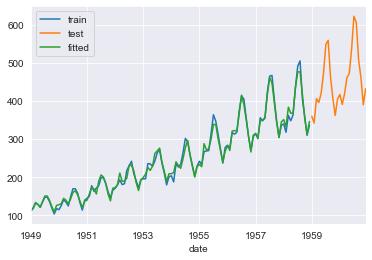

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = flights.passengers[:120]
test = flights.passengers[120:]

passengers_hw = ExponentialSmoothing(train,
  trend='add', seasonal='mul',
  seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='train')
test.plot(legend=True, label='test')
passengers_hw.fittedvalues.plot(legend=True, label='fitted')

Forecast

Text(0.5, 1.0, 'Train, test, fitted & predicted values using Holt-Winters')

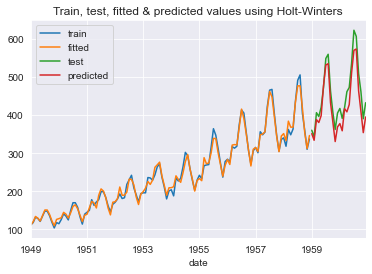

In [25]:
passengers_predicted = passengers_hw.forecast(24)

train.plot(legend=True, label='train')
passengers_hw.fittedvalues.plot(legend=True, label='fitted')

test.plot(legend=True, label='test')
passengers_predicted.plot(legend=True, label='predicted')

plt.title('Train, test, fitted & predicted values using Holt-Winters')

### How to choose the appropriate model

In order to calculate forecasts of a time series using Exponential Moving Average, we need to make a few decisions, a.o. which of the three versions (single/double/triple exponential smoothing) to choose. A rule of thumb:

- If the data seems to fluctuate around the same level, without seasonally recurring patterns, choose **Single Exponential Smoothing**
- If there is a upward or downward trend in the data, choose **Double Exponential Smoothing**, a.k.a. **Holt's method**
    - If the trend seems to be linear, use the *additive* model
    - If the trend seems to increase over time, use the *multiplicative* model
- If there are seasonally recurring patterns in the observations, choose **Triple Exponential Smoothing**, a.k.a. **Holt-Winters' method**
    - If the seasonal patterns stay the same, choose the *additive* variant
    - If they increase or decrease over time, choose *multiplicative*

### Evaluating the quality of a model

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f'MAE = {mean_absolute_error(test,passengers_predicted)}')
print(f'MSE = {mean_squared_error(test,passengers_predicted)}')

MAE = 28.97937810845662
MSE = 1055.6600336835706


In [27]:
print(f'√MSE  = {np.sqrt(mean_squared_error(test,passengers_predicted))}')
print(f'stdev = {flights.passengers.std()}')

√MSE  = 32.49092232737585
stdev = 119.9663169429432


### Decomposing a time series

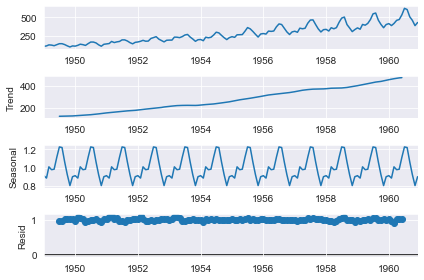

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

passengers_decomposed = seasonal_decompose(flights, model='multiplicative')
passengers_decomposed.plot();